# Preamble and Imports

In [ ]:
from google.colab import drive

drive.mount("/content/drive/")

Mounted at /content/drive/


# Data Understanding

First things first... we need to understand what our data looks like. Lets start by just printing out both of our data sets

In [ ]:
import os

directory = "/content/drive/My Drive/Colab/Data Analytics"
train_set = directory + "/MixedProsCons_train.txt"
test_set = directory + "/MixedProsCons_test_nolabel.txt"

# Train Dataset

In [ ]:
with open(train_set, "r") as file1:
    train_set_doc = file1.read()
    # print(FileContent)

print(train_set_doc)


        <Cons>None as far as I can tell</Cons>
        <Pros>Very versatile</Pros>
        <Pros>uses the 3.5 inch floppy disk as storage device, affordable price, rugged design,onscreen battery meter</Pros>
<Cons>none as of yet</Cons>
<Pros>Very classy look and feel, tons of useful features, easy to navigate</Pros>
        <Cons>Cartridge change electronics / printer driver</Cons>
        <Cons>photo size restrictions</Cons>
        <Pros>very good quality of printing, shape allows you to sit it on a shelf</Pros>
<Cons>Face of phone small, a little hard to read</Cons>
        <Pros>Size, light weight, quality pictures, picture modes</Pros>
        <Pros>great picture quality</Pros>
        <Cons>lcd zoom quality poor, Proprietary memory</Cons>
<Pros>Quality sound, Easy to use, Nice features</Pros>
        <Cons>no support from sony</Cons>
        <Pros>Print quality, software, speed</Pros>
<Cons>Unusable Data and Voice Service via T-Mobile</Cons>
        <Pros>Long zoom, manual settin

# Test Dataset

In [ ]:
with open(test_set, "r", encoding='windows-1254') as file2:
    test_set_doc = file2.read()
    # print(FileContent)

print(test_set_doc)

Output hidden; open in https://colab.research.google.com to view.

Awesome. That was easy. It appears that both of our datasets are encoded in XML. With the difference being that our training dataset has Pros and Cons labels, while our training dataset uses Labs for all of it's labels. 

It also appears that for every rating in our files, it spans one and only one line. This is great because it means we won't have to do any transforming where we have to combine lines.

One thing we can clearly see though, is that there are large spaces or tabs in front of some of our labels. This may not be a problem if we are splitting up our files line by line, but lets take note just in case it does pose as a problem.

# Data Preparation
The most important step... preparing our data to be modelled

So for preparing our data, I need to look at what kind/type/form we need to have our data in so that our modeling techniques can use the data we provide.

When it comes to modeling algorithms in Google Colab and Python for data analysis, the most common form of data is that of Dataframes from the Pandas software library. Dataframes are simply two-dimensional tables that will hold our data. One column for the polarity (whether it is a pro or a con review), and the other column for the review text/words itself.

As for our test data, we'll also need that in form of a dataframe, but we do not know the polarity just yet... so a single column will do. 

# Train Dataframe Creation

In [ ]:
import pandas as pd

df = open(train_set, "r")
lines = df.readlines()
df.close()

# get rid of the blank space of our lines
for index, line in enumerate(lines):
      lines[index] = line.strip()

df_train = pd.DataFrame(columns=('Polarity', 'Review'))

i = 0
for line in lines:
  if '</Pros>' in line:
    df_train.loc[i] = [1, line[6:-7]] # the numbers here and below get rid of the label
  if '</Cons>' in line:
    df_train.loc[i] = [0, line[6:-7]]
  i = i + 1

df_train.head()


,Polarity,Review
0,0,None as far as I can tell
1,1,Very versatile
2,1,uses the 3.5 inch floppy disk as storage devic...
3,0,none as of yet
4,1,"Very classy look and feel, tons of useful feat..."


# Test Dataframe Creation

In [ ]:
df = open(test_set, "r", encoding='windows-1254')
lines = df.readlines()
df.close()

for index, line in enumerate(lines):
      lines[index] = line.strip()

df_test = pd.DataFrame(columns=['Review'])

i = 0

for line in lines:
  df_test.loc[i] = [line[6:-7]] # the numbers get rid of the label
  i = i + 1

df_test.head()

,Review
0,It is just a bit noisy
1,"Easy to use, nice quality pics"
2,"Easy to use, takes great pictures, lots of opt..."
3,"easy to use, great output"
4,"Cool looks and screen, lots of features"


# Modelling

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(df_train.Review)
words_df = pd.DataFrame(vectors.toarray(), columns=vectorizer.get_feature_names_out())
words_df

,00,000,10,100,10x,120,1200,1200x1200,1280,13,15,16,16m,16mb,16x,175,179,1987,199,1gb,1st,20,200,2000,2003,200hrs,23,24,2400x1200,256,27,29,2mp,2way,2x,30,300,320x240,32mb,34,...,wires,wise,wish,wished,with,without,won,wonderful,work,workgroups,workmanship,works,world,worst,worth,worthless,worthy,would,wow,wraps,wrist,write,writes,x73,xd,xp,year,yearbook,years,yellow,yet,yikes,you,young,your,yourself,youth,zeiss,ziess,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.616042,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.488708,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X = words_df
y = df_train.Polarity
# needed to add the line below becasue it thought it was strings
y=y.astype('int')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from numpy import mean
from numpy import std

In [ ]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)

overall_scores = pd.DataFrame()
overall_means = []

# Logistic Regression

In [ ]:
logreg = LogisticRegression(C=1e4, solver='lbfgs', max_iter=1000000)
logreg.fit(X, y)

logreg_scores = cross_val_score(logreg, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

print('Log Reg Accuracy: %.3f (%.3f)' % (mean(logreg_scores), std(logreg_scores)))

overall_scores['Logistic Regression'] = logreg_scores
overall_means.append(mean(logreg_scores))

Log Reg Accuracy: 0.879 (0.018)


# Random Forest Classifier

In [ ]:
forest = RandomForestClassifier(n_estimators=50)
forest.fit(X, y)

forest_scores = cross_val_score(forest, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

print('Log Reg Accuracy: %.3f (%.3f)' % (mean(forest_scores), std(forest_scores)))

overall_scores['Random Forest'] = forest_scores
overall_means.append(mean(forest_scores))

Log Reg Accuracy: 0.888 (0.017)


# Linear SVC

In [ ]:
svc = LinearSVC()
svc.fit(X, y)

svc_scores = cross_val_score(svc, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

print('Log Reg Accuracy: %.3f (%.3f)' % (mean(svc_scores), std(svc_scores)))

overall_scores['Linear SVC'] = svc_scores
overall_means.append((mean(svc_scores)))

Log Reg Accuracy: 0.897 (0.026)


# Multinomial NB

In [ ]:
bayes = MultinomialNB()
bayes.fit(X, y)

bayes_scores = cross_val_score(bayes, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

print('Log Reg Accuracy: %.3f (%.3f)' % (mean(bayes_scores), std(bayes_scores)))

overall_scores['Multinomial NB'] = bayes_scores
overall_means.append((mean(bayes_scores)))

Log Reg Accuracy: 0.902 (0.023)


In [ ]:
print(overall_scores)
print(overall_means)

   Logistic Regression  Random Forest  Linear SVC  Multinomial NB
0                0.900          0.880       0.905           0.910
1                0.875          0.890       0.890           0.930
2                0.890          0.895       0.915           0.920
3                0.885          0.895       0.905           0.905
4                0.875          0.850       0.885           0.865
5                0.880          0.915       0.925           0.920
6                0.830          0.895       0.870           0.855
7                0.895          0.900       0.930           0.910
8                0.880          0.890       0.910           0.900
9                0.875          0.870       0.900           0.905
[0.8785000000000001, 0.8879999999999999, 0.9035, 0.9019999999999999]


# Experimenting with Classifiers

Okay, so now we know that all of our models are actually fairly accurate. Let's now do some experimenting with each of our models to try and get the most accurate form of each of our classifiers.

# Setting up Dataframes for each test

In [ ]:
logisticFrame = pd.DataFrame()
randomForestFrame = pd.DataFrame()
svcFrame = pd.DataFrame()
multiFrame = pd.DataFrame()

logisticFrameMean = []
randomForestFrameMean = []
svcFrameMean = []
multiFrameMean = []

cv = KFold(n_splits=10, random_state=1, shuffle=True)

# Logistic Regression Testing

In [ ]:
logreg1 = LogisticRegression(C=1e4, solver='lbfgs', max_iter=1000000)
logreg2 = LogisticRegression(C=1e4, solver='newton-cg', max_iter=1000000)
logreg3 = LogisticRegression(C=1e4, solver='liblinear', max_iter=1000000)
logreg4 = LogisticRegression(C=1e4, solver='sag', max_iter=1000000)
logreg5 = LogisticRegression(C=1e4, solver='saga', max_iter=1000000)


# logreg6 = LogisticRegression(C=1e4, solver='lbfgs', max_iter=1000000)

logreg1.fit(X, y)
logreg2.fit(X, y)
logreg3.fit(X, y)
logreg4.fit(X, y)
logreg5.fit(X, y)

logreg_scores = cross_val_score(logreg1, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
logisticFrame['Logreg1'] = logreg_scores
logisticFrameMean.append((mean(logreg_scores)))

logreg_scores = cross_val_score(logreg2, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
logisticFrame['Logreg2'] = logreg_scores
logisticFrameMean.append((mean(logreg_scores)))

logreg_scores = cross_val_score(logreg3, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
logisticFrame['Logreg3'] = logreg_scores
logisticFrameMean.append((mean(logreg_scores)))

logreg_scores = cross_val_score(logreg4, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
logisticFrame['Logreg4'] = logreg_scores
logisticFrameMean.append((mean(logreg_scores)))

logreg_scores = cross_val_score(logreg5, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
logisticFrame['Logreg5'] = logreg_scores
logisticFrameMean.append((mean(logreg_scores)))

logisticFrame
logisticFrameMean

[0.8785000000000001, 0.8785000000000001, 0.8785000000000001, 0.8795, 0.881]

# Random Forest Testing

In [ ]:
forest1 = RandomForestClassifier(n_estimators=50)
forest2 = RandomForestClassifier(n_estimators=75)
forest3 = RandomForestClassifier(n_estimators=100)
forest4 = RandomForestClassifier(n_estimators=125)
forest5 = RandomForestClassifier(n_estimators=150)


forest6 = RandomForestClassifier(n_estimators=50, criterion="entropy")
forest7 = RandomForestClassifier(n_estimators=75, criterion="entropy")
forest8 = RandomForestClassifier(n_estimators=100, criterion="entropy")
forest9 = RandomForestClassifier(n_estimators=125, criterion="entropy")
forest10 = RandomForestClassifier(n_estimators=150, criterion="entropy")

forest1.fit(X, y)
forest2.fit(X, y)
forest3.fit(X, y)
forest4.fit(X, y)
forest5.fit(X, y)

forest6.fit(X, y)
forest7.fit(X, y)
forest8.fit(X, y)
forest9.fit(X, y)
forest10.fit(X, y)

forest_scores = cross_val_score(forest1, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
randomForestFrame['RF1'] = forest_scores
randomForestFrameMean.append((mean(forest_scores)))
forest_scores = cross_val_score(forest2, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
randomForestFrame['RF2'] = forest_scores
randomForestFrameMean.append((mean(forest_scores)))
forest_scores = cross_val_score(forest3, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
randomForestFrame['RF3'] = forest_scores
randomForestFrameMean.append((mean(forest_scores)))
forest_scores = cross_val_score(forest4, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
randomForestFrame['RF4'] = forest_scores
randomForestFrameMean.append((mean(forest_scores)))
forest_scores = cross_val_score(forest5, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
randomForestFrame['RF5'] = forest_scores
randomForestFrameMean.append((mean(forest_scores)))

forest_scores = cross_val_score(forest6, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
randomForestFrame['RF6'] = forest_scores
randomForestFrameMean.append((mean(forest_scores)))
forest_scores = cross_val_score(forest7, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
randomForestFrame['RF7'] = forest_scores
randomForestFrameMean.append((mean(forest_scores)))
forest_scores = cross_val_score(forest8, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
randomForestFrame['RF8'] = forest_scores
randomForestFrameMean.append((mean(forest_scores)))
forest_scores = cross_val_score(forest9, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
randomForestFrame['RF9'] = forest_scores
randomForestFrameMean.append((mean(forest_scores)))
forest_scores = cross_val_score(forest10, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
randomForestFrame['RF10'] = forest_scores
randomForestFrameMean.append((mean(forest_scores)))

randomForestFrame
randomForestFrameMean

[0.8825,
 0.8844999999999998,
 0.8870000000000001,
 0.8845000000000001,
 0.8890000000000002,
 0.8895,
 0.8885,
 0.8895,
 0.8865000000000001,
 0.8855000000000001]

# Linear SVC Testing

In [ ]:
svc1 = LinearSVC(loss="hinge")
svc2 = LinearSVC(loss="squared_hinge")

svc3 = LinearSVC(loss="hinge", multi_class="crammer_singer")
svc4 = LinearSVC(loss="squared_hinge", multi_class="crammer_singer")

svc5 = LinearSVC(loss="hinge", max_iter=2000)
svc6 = LinearSVC(loss="squared_hinge", max_iter=2000)
svc7 = LinearSVC(loss="hinge", max_iter=5000)
svc8 = LinearSVC(loss="squared_hinge", max_iter=2000)
svc9 = LinearSVC(loss="hinge", max_iter=7500)
svc10 = LinearSVC(loss="squared_hinge", max_iter=7500)


svc1.fit(X, y)
svc2.fit(X, y)

svc3.fit(X, y)
svc4.fit(X, y)

svc5.fit(X, y)
svc6.fit(X, y)
svc7.fit(X, y)
svc8.fit(X, y)
svc9.fit(X, y)
svc10.fit(X, y)

svc_scores = cross_val_score(svc1, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
svcFrame['SVC1'] = svc_scores
svcFrameMean.append((mean(svc_scores)))
svc_scores = cross_val_score(svc2, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
svcFrame['SVC2'] = svc_scores
svcFrameMean.append((mean(svc_scores)))

svc_scores = cross_val_score(svc3, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
svcFrame['SVC3'] = svc_scores
svcFrameMean.append((mean(svc_scores)))
svc_scores = cross_val_score(svc4, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
svcFrame['SVC4'] = svc_scores
svcFrameMean.append((mean(svc_scores)))

svc_scores = cross_val_score(svc5, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
svcFrame['SVC5'] = svc_scores
svcFrameMean.append((mean(svc_scores)))
svc_scores = cross_val_score(svc6, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
svcFrame['SVC6'] = svc_scores
svcFrameMean.append((mean(svc_scores)))
svc_scores = cross_val_score(svc7, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
svcFrame['SVC7'] = svc_scores
svcFrameMean.append((mean(svc_scores)))
svc_scores = cross_val_score(svc8, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
svcFrame['SVC8'] = svc_scores
svcFrameMean.append((mean(svc_scores)))
svc_scores = cross_val_score(svc9, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
svcFrame['SVC9'] = svc_scores
svcFrameMean.append((mean(svc_scores)))
svc_scores = cross_val_score(svc10, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
svcFrame['SVC10'] = svc_scores
svcFrameMean.append((mean(svc_scores)))

svcFrame
svcFrameMean

[0.897,
 0.8975,
 0.8959999999999999,
 0.8959999999999999,
 0.897,
 0.8975,
 0.897,
 0.8975,
 0.897,
 0.8975]

# Multinomial NB Testing

In [ ]:
bayes1 = MultinomialNB(alpha=0)
bayes2 = MultinomialNB(alpha=1)

bayes1.fit(X, y)
bayes2.fit(X, y)

bayes_scores = cross_val_score(bayes1, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
multiFrame['Multinomial NB 1'] = bayes_scores
multiFrameMean.append((mean(bayes_scores)))
bayes_scores = cross_val_score(bayes2, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
multiFrame['Multinomial NB 2'] = bayes_scores
multiFrameMean.append((mean(bayes_scores)))

multiFrame
multiFrameMean

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN


[0.8445, 0.9019999999999999]

# Experiment Results:

So for the experiment, I had employed all of our classifiers using a variety of different parameters to see if I could get an idea of what the most accurate classifier for our problem was, and to help choose which classifier to use. The otuputs of these experiments gave me the mean classification accuracy on a 10 k cross fold. These are the results: 

LogisticRegression - [0.8785000000000001, 0.8785000000000001, 0.8785000000000001, 0.8795, 0.881]
<br>

RandomForestClassifier - [0.8815,
 0.883,
 0.8869999999999999,
 0.889,
 0.8915000000000001,
 0.8850000000000001,
 0.8880000000000001,
 0.8869999999999999,
 0.8880000000000001,
 0.8925000000000001]
 <br>
LinearSVC - [0.9075, 0.9035, 0.901, 0.901, 0.9075, 0.9035, 0.9075, 0.9035, 0.9075, 0.9035] <br>
MultinomialNB - [0.8445, 0.9019999999999999]

Without even calculating the means of these means, I can see that our LinearSVC classifier had our highest classification accuracy AND had a stellar standard deviation of means. So it looks like I should be choosing LinearSVC as my model. But first let's do a quick hypothesis test between LinearSVC and RandomForestClassifier to make sure they are significantly different in results.

# Stop Word Testing

I thought to myself: "What could we do to make preprocess our text a bit better before throwing it into the classifier." Then I remembered about stop words. I employed a simple stopword removal function while we read in our text to put into dataframes, and then ran our LinearSVC experimentation to see how it compared to our original accuracy results. This was the results of the stopwords means: <br>

[0.897,
 0.8975,
 0.8959,
 0.8959,
 0.897,
 0.8975,
 0.897,
 0.8975,
 0.897,
 0.8975] <br>
 Compared to our original experiment with results...<br>
 [0.9075, 0.9035, 0.901, 0.901, 0.9075, 0.9035, 0.9075, 0.9035, 0.9075, 0.9035] <br><br>
 Obviously you can see here that with stopwords, our model was actually slightly less accurate. Thus I decided we will keep all of the words when we model, because it's not like with working in Google Colab we are struggling with the amount of words we are using.

# Linear SVC Specific Testing

In [ ]:
svcFrameMean = []
svcFrame = pd.DataFrame()
svcFrameSTD = []

svc1 = LinearSVC(loss="hinge", tol=1e-3, verbose=1, max_iter=10000)
svc2 = LinearSVC(loss="hinge", tol=1e-4, verbose=1, max_iter=10000)
svc3 = LinearSVC(loss="hinge", tol=1e-5, verbose=1, max_iter=10000)

svc4 = LinearSVC(loss="hinge", C=0.1, verbose=1, max_iter=100000)
svc5 = LinearSVC(loss="hinge", C=1, verbose=1, max_iter=100000)
svc6 = LinearSVC(loss="hinge", C=10, verbose=1, max_iter=100000)
svc7 = LinearSVC(loss="hinge", C=100, verbose=1, max_iter=10000)

svc1.fit(X, y)
svc2.fit(X, y)

svc3.fit(X, y)
svc4.fit(X, y)

svc5.fit(X, y)
svc6.fit(X, y)
svc7.fit(X, y)

svc_scores = cross_val_score(svc1, X, y, scoring='accuracy', cv=cv, n_jobs=-1, verbose=1)
svcFrame['SVC1'] = svc_scores
svcFrameMean.append((mean(svc_scores)))
svcFrameSTD.append((std(svc_scores)))
svc_scores = cross_val_score(svc2, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
svcFrame['SVC2'] = svc_scores
svcFrameMean.append((mean(svc_scores)))
svcFrameSTD.append((std(svc_scores)))

svc_scores = cross_val_score(svc3, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
svcFrame['SVC3'] = svc_scores
svcFrameMean.append((mean(svc_scores)))
svcFrameSTD.append((std(svc_scores)))
svc_scores = cross_val_score(svc4, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
svcFrame['SVC4'] = svc_scores
svcFrameMean.append((mean(svc_scores)))
svcFrameSTD.append((std(svc_scores)))

svc_scores = cross_val_score(svc5, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
svcFrame['SVC5'] = svc_scores
svcFrameMean.append((mean(svc_scores)))
svcFrameSTD.append((std(svc_scores)))
svc_scores = cross_val_score(svc6, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
svcFrame['SVC6'] = svc_scores
svcFrameMean.append((mean(svc_scores)))
svcFrameSTD.append((std(svc_scores)))
svc_scores = cross_val_score(svc7, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
svcFrame['SVC7'] = svc_scores
svcFrameMean.append((mean(svc_scores)))
svcFrameSTD.append((std(svc_scores)))

print(svcFrame)
print(svcFrameMean)
print(svcFrameSTD)

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.1s finished


    SVC1   SVC2   SVC3   SVC4   SVC5   SVC6   SVC7
0  0.905  0.905  0.905  0.825  0.905  0.900  0.895
1  0.915  0.915  0.915  0.845  0.915  0.875  0.845
2  0.910  0.910  0.910  0.790  0.910  0.905  0.870
3  0.925  0.925  0.925  0.850  0.925  0.905  0.840
4  0.865  0.865  0.865  0.780  0.865  0.865  0.845
5  0.930  0.930  0.930  0.880  0.930  0.910  0.880
6  0.890  0.890  0.890  0.845  0.890  0.845  0.825
7  0.940  0.940  0.940  0.860  0.940  0.905  0.870
8  0.900  0.900  0.900  0.825  0.900  0.890  0.865
9  0.895  0.895  0.895  0.845  0.895  0.895  0.870
[0.9075, 0.9075, 0.9075, 0.8345, 0.9075, 0.8895, 0.8605]
[0.02064582282206258, 0.02064582282206258, 0.02064582282206258, 0.029021543721862893, 0.02064582282206258, 0.020180436070610583, 0.0200561711201316]


So it seems there is not much difference in our results when we change our parameters slightly. We were getting the exact same results for svc1, 2, 3, and 5 so if we choose any of those values we should be good to go.

# Comparing LinearSVC vs Bayes

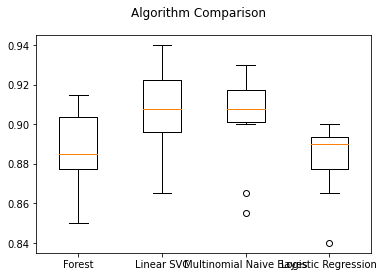

In [ ]:
from scipy.stats import ttest_ind
import pandas as pd
import matplotlib.pyplot as plt

cv = KFold(n_splits=10, random_state=1, shuffle=True)
results = []
names = []
# Forest--------------------------------------------
forest = RandomForestClassifier(n_estimators=50, criterion="entropy")
forest.fit(X,y)
forest_scores = cross_val_score(forest, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

results.append(forest_scores)
names.append("Forest")

# LinearSVC -----------------------------------------------------------------------
linearSVC = LinearSVC(loss="hinge", tol=1e-4, max_iter=10000)
linearSVC.fit(X, y)
svc_scores = cross_val_score(linearSVC, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

results.append(svc_scores)
names.append("Linear SVC")

# Multinominal NB -----------------------------------------------------------
bayes2 = MultinomialNB(alpha=1)
bayes2.fit(X, y)
bayes_scores = cross_val_score(bayes2, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

results.append(bayes_scores)
names.append("Multinomial Naive Bayes")

# Logistic Regression --------------------------------------------------------
logreg5 = LogisticRegression(C=1e4, solver='saga', max_iter=1000000)
logreg5.fit(X, y)
logreg_scores = cross_val_score(logreg5, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

results.append(logreg_scores)
names.append("Logistic Regression")

fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
print(bayes_scores)
print(svc_scores)

print(std(bayes_scores))
print(std(svc_scores))

[0.91  0.93  0.92  0.905 0.865 0.92  0.855 0.91  0.9   0.905]
[0.905 0.915 0.91  0.925 0.865 0.93  0.89  0.94  0.9   0.895]
0.022715633383201112
0.02064582282206258


When you look at that boxplot, it might actually appears that Mutlinomial NB had a better accuracy than Linear SVC. But when actually printing the results above, you can see that Linear SVC has just as many outliers as Multinomial NB. In fact, LinearSVC had a higher best accuracy as well. Just in case, I want to run our experiment one last time but on a 20 K cross fold.

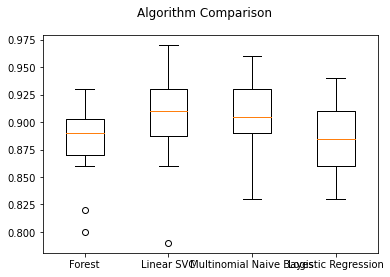

In [ ]:
from scipy.stats import ttest_ind
import pandas as pd
import matplotlib.pyplot as plt

cv = KFold(n_splits=20, random_state=1, shuffle=True)
results = []
names = []
# Forest--------------------------------------------
forest = RandomForestClassifier(n_estimators=50, criterion="entropy")
forest.fit(X,y)
forest_scores = cross_val_score(forest, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

results.append(forest_scores)
names.append("Forest")

# LinearSVC -----------------------------------------------------------------------
linearSVC = LinearSVC(loss="hinge", tol=1e-4, max_iter=10000)
linearSVC.fit(X, y)
svc_scores = cross_val_score(linearSVC, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

results.append(svc_scores)
names.append("Linear SVC")

# Multinominal NB -----------------------------------------------------------
bayes2 = MultinomialNB(alpha=1)
bayes2.fit(X, y)
bayes_scores = cross_val_score(bayes2, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

results.append(bayes_scores)
names.append("Multinomial Naive Bayes")

# Logistic Regression --------------------------------------------------------
logreg5 = LogisticRegression(C=1e4, solver='saga', max_iter=1000000)
logreg5.fit(X, y)
logreg_scores = cross_val_score(logreg5, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

results.append(logreg_scores)
names.append("Logistic Regression")

fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
print(bayes_scores)
print(svc_scores)

print(std(bayes_scores))
print(std(svc_scores))

print(mean(bayes_scores))
print(mean(svc_scores))

[0.89 0.93 0.91 0.95 0.94 0.91 0.92 0.89 0.83 0.92 0.96 0.88 0.9  0.83
 0.93 0.88 0.9  0.9  0.9  0.93]
[0.88 0.94 0.9  0.93 0.9  0.91 0.92 0.91 0.79 0.92 0.97 0.89 0.92 0.86
 0.95 0.89 0.93 0.88 0.88 0.95]
0.032939338184001216
0.038131351929875226
0.9049999999999999
0.9059999999999999


And to confirm my suspicionns, it appears that LinearSVC is a more accurate and consistent model, that we will use for our final model generation. Surprisingly, there is a huge outlier with LinearSVC though that went all the way down to 0.79 accuracy. I would hope that this is because of the smaller verification set size as we were doing a 20 k cross fold, but this should still be taken into consideration. I believe this is why the standard deviation of LinearSVC is slightly above Multinomial NB as well. 

# Final Model Generation

In [ ]:
unknown_vectors = vectorizer.transform(df_test.Review)
unknown_words_df = pd.DataFrame(unknown_vectors.toarray(), columns=vectorizer.get_feature_names_out())
unknown_words_df

,00,000,10,100,10x,120,1200,1200x1200,1280,13,15,16,16m,16mb,16x,175,179,1987,199,1gb,1st,20,200,2000,2003,200hrs,23,24,2400x1200,256,27,29,2mp,2way,2x,30,300,320x240,32mb,34,...,wires,wise,wish,wished,with,without,won,wonderful,work,workgroups,workmanship,works,world,worst,worth,worthless,worthy,would,wow,wraps,wrist,write,writes,x73,xd,xp,year,yearbook,years,yellow,yet,yikes,you,young,your,yourself,youth,zeiss,ziess,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43870,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43871,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43872,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43873,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.metrics import confusion_matrix

finalSVC = LinearSVC(loss="hinge", tol=1e-4, max_iter=10000)

finalSVC.fit(X.values, y)

# results = finalSVC.predict(unknown_vectors)

# results = pd.DataFrame()
df_test['Predictions'] = finalSVC.predict(unknown_vectors)

Results on test set below. Outputs to a output.txt file that contains a CSV list of our predictions (in order)

In [ ]:
print(df_test)
outputFile = directory + "/output.txt"

with open(outputFile, 'w') as writefile:
  for i in df_test['Predictions']:
    writefile.write(str(i)+',\n')

                                                  Review  Predictions
0                                 It is just a bit noisy            0
1                         Easy to use, nice quality pics            1
2      Easy to use, takes great pictures, lots of opt...            1
3                              easy to use, great output            1
4                Cool looks and screen, lots of features            1
...                                                  ...          ...
43870  Speed,print quality,robust build. Economical i...            1
43871             Not comfortable for long conversations            0
43872  Eats batteries, however use can use NiMH recha...            0
43873  It is very easy to use.  Takes a floppy disk t...            1
43874            envelopes a bit tricky &amp;amp; slower            0

[43875 rows x 2 columns]


And below here we are outputting a file in the same format as the data we received. 

In [ ]:
import pandas as pd
outputArray = []
outputFileReview = directory + "/outputReview.txt"

for index, row in df_test.iterrows():
  if(row['Predictions'] == 1):
      # print(row['Review'])
      outputArray.append('<Pro>'+ row['Review'] + '</Pro>')
  else:
      outputArray.append('<Con>'+ row['Review'] + '</Con>')

print(outputArray)

with open(outputFileReview, 'w') as writefile:
  for i in outputArray:
    writefile.write(i+'\n')



Output hidden; open in https://colab.research.google.com to view.